In [337]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Load in, read, and merge the 2 files for analysis
mouse_data_path = 'Resources/Mouse_metadata.csv'
study_data_path = 'Resources/Study_results.csv'

mouse_data = pd.read_csv(mouse_data_path)
study_data = pd.read_csv(study_data_path)

combined_mouse = pd.merge(mouse_data, study_data, how='inner', on='Mouse ID')

# Preview results
combined_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [338]:
# Check for number of mice in the dataset
number_of_mice = combined_mouse['Mouse ID'].nunique()
number_of_mice

249

In [339]:
# Get the duplicate mice by ID that shows up for Mouse ID and Timepoint
duplicated_mice = combined_mouse[combined_mouse.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [340]:
# Creating clean df: Drop the duplicate mouse g989
clean_df = combined_mouse[combined_mouse['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [341]:
# Check for the number of mice in the clean dataframe
# Should have one less mouse: Mouse g989
clean_df['Mouse ID'].nunique()

248

In [342]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = clean_df.groupby('Drug Regimen')
tumor_mean = regimen_df['Tumor Volume (mm3)'].mean()
tumor_median = regimen_df['Tumor Volume (mm3)'].median()
tumor_var = regimen_df['Tumor Volume (mm3)'].var()
tumor_stdev = regimen_df['Tumor Volume (mm3)'].std()
tumor_sem = regimen_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
sumstats_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean,
                            'Median Tumor Volume': tumor_median,
                            'Tumor Volume Variance': tumor_var,
                            'Tumor Std. Deviation': tumor_stdev,
                            'Tumor Std. Error': tumor_sem})

sumstats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Std. Deviation,Tumor Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


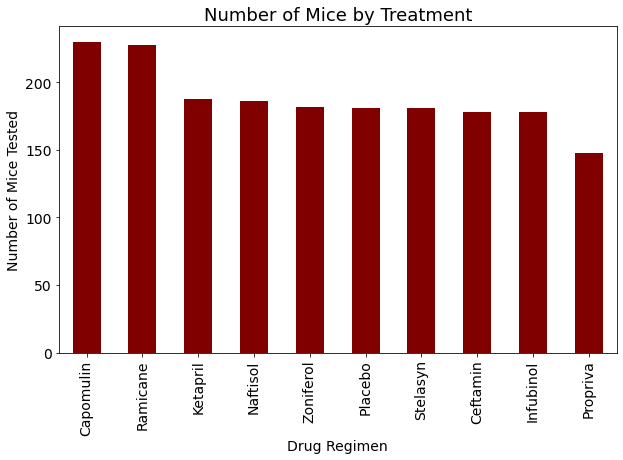

In [343]:
# Simple barchart using Pandas analyzing the count of Timepoints per treatment

# Group the clean df by Drug Regimen again and take the total count of mice by each regimen
total_timepoints = clean_df.groupby(['Drug Regimen']).count()['Timepoint']
total_timepoints

# Create a DataFrame showing the count of each timepoint by drug regimen, in descending order
total_timepoints_df = pd.DataFrame(total_timepoints).sort_values(by='Timepoint', ascending=False)

# Make df into bar chart
total_timepoints_df.plot(figsize=(10,6), kind='bar', color='maroon', legend=False, fontsize=14)
plt.xlabel('Drug Regimen', fontsize= 14)
plt.ylabel('Number of Mice Tested', fontsize=14)
plt.title('Number of Mice by Treatment', fontsize=18)
plt.show()


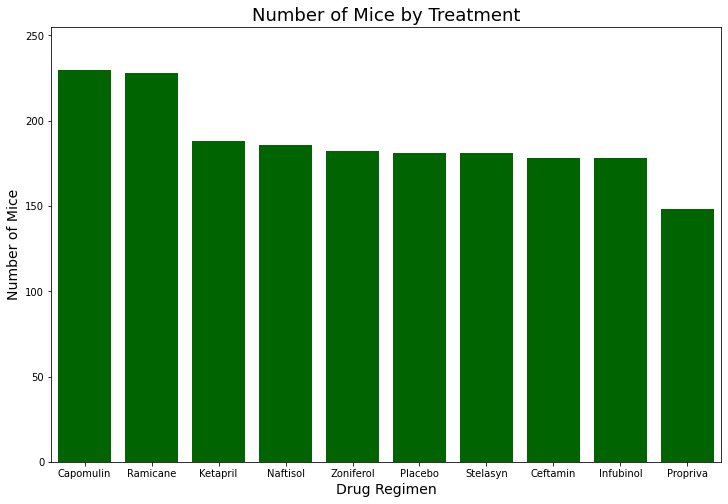

In [344]:
# Better looking barchart using PyPlot analyzing the number of Timeopints per Treatment

# Establish the x-axis and figure
fig1, ax1 = plt.subplots(figsize=(12,8))
x_axis = np.arange(len(total_timepoints_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, total_timepoints_df.index)

# Create bar chart with df info
plt.bar(x_axis, total_timepoints_df['Timepoint'], 
        color='darkgreen', 
        align='center')

# Create limits, labels, and titles
plt.title('Number of Mice by Treatment', fontsize=18)
plt.xlabel('Drug Regimen', fontsize=14)
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylabel('Number of Mice', fontsize=14)
plt.ylim(0, max(total_timepoints_df['Timepoint'])+25)

plt.show()